# Imports

In [177]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.impute import KNNImputer
from scripts import loctocord

# Pre-processing

In [178]:
loc_generator_df = pd.read_csv('dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')

In [179]:
loc_generator_df

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [180]:
loc_generator_df = loc_generator_df.drop(columns = ["country_code","usa_state","country","latitude","longitude"])

In [181]:
df = pd.read_csv("dataset/DataEngineer.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\r\nSagence is a management...,4.5,Sagence\r\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\r\n\r\n- Architect, build...",3.4,Enterprise Integration\r\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\r\n\r\nJob description\r\n\r\nPositio...,5.0,Maestro Technologies\r\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\r\n\r\n\r\nThis position wi...,4.8,Jane Street\r\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\r\n\r\nJob Details\r\nLevel\r\nE...,3.7,GNY Insurance Companies\r\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [182]:
df[['City','State']] = df["Location"].str.split(",",expand=True)
df = df[~df["State"].str.contains("United Kingdom")] # Removing United Kingdom from state!

In [183]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'City', 'State'],
      dtype='object')

In [184]:
df.replace('-1', np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)

In [185]:
df.isnull().mean()

Job Title            0.000000
Salary Estimate      0.000000
Job Description      0.000000
Rating               0.092563
Company Name         0.000000
Location             0.000000
Headquarters         0.049051
Size                 0.071994
Founded              0.225870
Type of ownership    0.058940
Industry             0.149525
Sector               0.148339
Revenue              0.047073
Competitors          0.691851
Easy Apply           0.942247
City                 0.000000
State                0.000000
dtype: float64

In [186]:
df['Type of ownership'].replace(regex='Company -', value='', inplace=True)
df.replace(regex='\\r', value='', inplace=True)
df.replace(regex='\\n', value=' ', inplace=True)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,City,State
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description Sagence is a management ad...,4.5,Sagence 4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",NaN,New York,NY
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities - Architect, build, and ...",3.4,Enterprise Integration 3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Private,IT Services,Information Technology,$25 to $50 million (USD),NaN,NaN,New York,NY
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview Job description Position Overview: ...,5.0,Maestro Technologies 5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Private,IT Services,Information Technology,$5 to $10 million (USD),NaN,NaN,New York,NY
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position This position will suppor...,4.8,Jane Street 4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,NaN,New York,NY
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer Job Details Level Experienced J...,3.7,GNY Insurance Companies 3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global 4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,NaN,Westlake,TX
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services 2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),NaN,NaN,Fort Worth,TX
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions 3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,Irving,TX
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity Charles Schwab & Co., Inc is...",3.5,Schwab 3.5,"Westlake, TX","Dettenheim, Germany",NaN,NaN,Public,NaN,NaN,Unknown / Non-Applicable,NaN,NaN,Westlake,TX


In [187]:
df['Salary Estimate mean'] = df['Salary Estimate']
df['Salary Estimate mean'].replace(regex='\(Glassdoor est.\)', value='', inplace=True)
df['Salary Estimate mean'].replace(regex='\(Employer est.\)', value='', inplace=True)
df['Salary Estimate mean'].replace(regex='K', value='000', inplace=True)
df['Salary Estimate mean'].replace(regex='\$', value='', inplace=True)
df['Salary Estimate mean'] = df['Salary Estimate mean'].str.split('-', expand=True).astype(int).mean(axis=1)


In [188]:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

In [189]:
df.dtypes

Job Title               category
Salary Estimate         category
Job Description         category
Rating                   float64
Company Name            category
Location                category
Headquarters            category
Size                    category
Founded                  float64
Type of ownership       category
Industry                category
Sector                  category
Revenue                 category
Competitors             category
Easy Apply              category
City                    category
State                   category
Salary Estimate mean     float64
dtype: object

In [190]:
df.duplicated(keep=False).sum()


24

Text(0.5, 1.0, 'Non nan values')

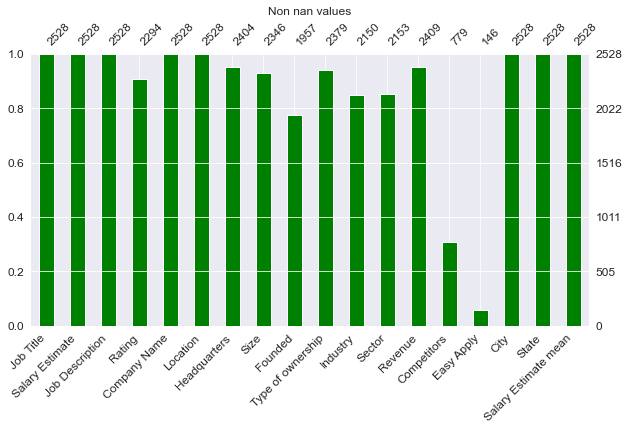

In [191]:
missingno.bar(df.iloc[:, :], color="green", figsize=(10, 5), fontsize=12)
plt.title('Non nan values')


Text(0.5, 1.0, 'Nan matrix')

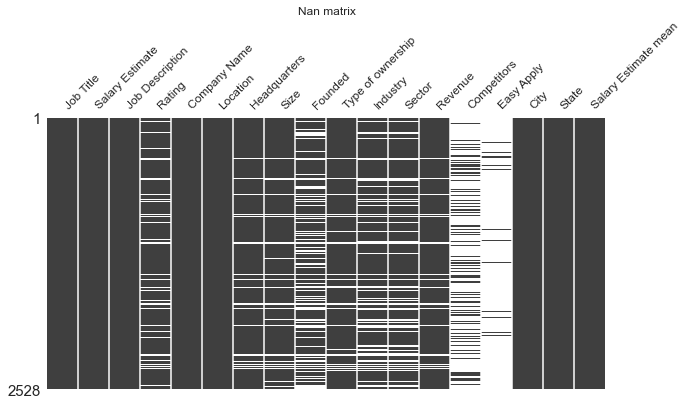

In [192]:
missingno.matrix(df.iloc[:, :], figsize=(
    10, 5), fontsize=12, sparkline=False)

plt.title('Nan matrix')

In [193]:
df.drop(columns=['Job Description', 'Company Name', 'Competitors', 'Easy Apply', 'Competitors'],inplace=True)

Text(0.5, 1.0, 'Nan values')

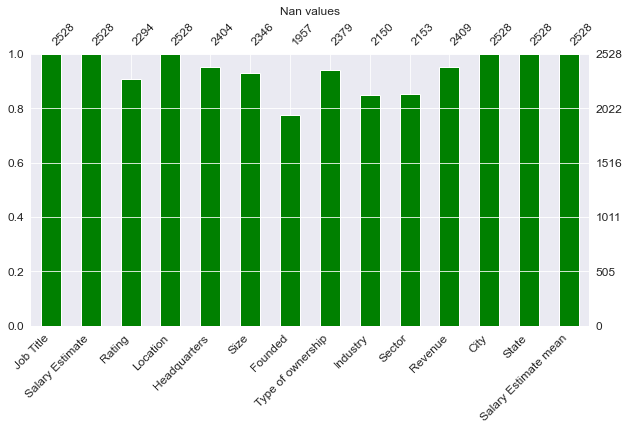

In [194]:
missingno.bar(df.iloc[:, :], color="green", figsize=(10, 5), fontsize=12)
plt.title('Nan values')


In [195]:
df['Revenue'].fillna(df['Revenue'].value_counts().idxmax(), inplace=True)
df['Headquarters'].fillna(df['Headquarters'].value_counts().idxmax(), inplace=True)
df['Size'].fillna(df['Size'].value_counts().idxmax(), inplace=True)
df['Industry'].fillna(df['Industry'].value_counts().idxmax(), inplace=True)
df['Sector'].fillna(df['Sector'].value_counts().idxmax(), inplace=True)
df['Type of ownership'].fillna(df['Type of ownership'].value_counts().idxmax(), inplace=True)



In [196]:
knn_imp = KNNImputer(n_neighbors=3)
# fit and transform the imputer on the dataset
df_knn = pd.DataFrame(knn_imp.fit_transform(df[['Rating', 'Founded', 'Salary Estimate mean']]), columns=['Rating', 'Founded', 'Salary Estimate mean'])


In [197]:
df_knn.isnull().sum()

Rating                  0
Founded                 0
Salary Estimate mean    0
dtype: int64

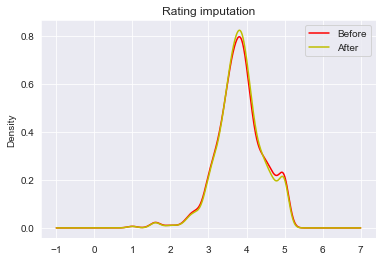

In [198]:
df['Rating'].plot.kde(color='r', label='Before')
df_knn["Rating"].plot.kde(color='y', label='After')
plt.title('Rating imputation')
plt.legend()


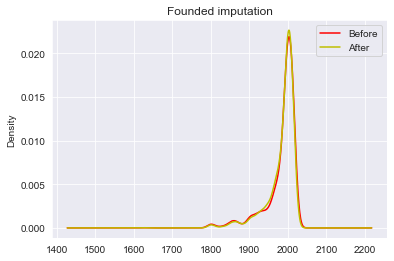

In [199]:
df['Founded'].plot.kde(color='r', label='Before')
df_knn["Founded"].plot.kde(color='y', label='After')
plt.title('Founded imputation')
plt.legend()

In [200]:
df[['Rating', 'Founded']] = df_knn[['Rating', 'Founded']]

Text(0.5, 1.0, 'Nan matrix')

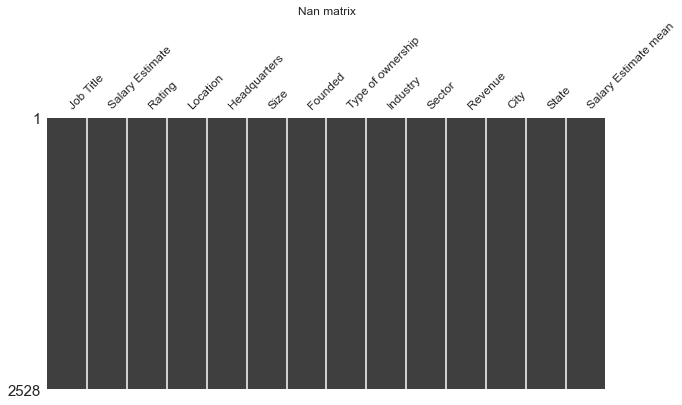

In [201]:
missingno.matrix(df.iloc[:, :], figsize=(
    10, 5), fontsize=12, sparkline=False)

plt.title('Nan matrix')

In [202]:
df['Founded'] = df['Founded'].astype('int')

In [203]:
#Dropping the outlier rows with Percentiles
upper_lim = df['Founded'].quantile(.95)
lower_lim = df['Founded'].quantile(.05)

#Drop outliers
df = df[(df['Founded'] < upper_lim) & (df['Founded'] > lower_lim)] 

In [204]:
df

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,City,State,Salary Estimate mean
0,Data Engineer,$80K-$150K (Glassdoor est.),4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Private,Consulting,Business Services,$10 to $25 million (USD),New York,NY,115000.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Private,IT Services,Information Technology,$25 to $50 million (USD),New York,NY,115000.0
2,Data Engineers,$80K-$150K (Glassdoor est.),5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Private,IT Services,Information Technology,$5 to $10 million (USD),New York,NY,115000.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,115000.0
4,Data Engineer,$80K-$150K (Glassdoor est.),3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Private,Insurance Carriers,Insurance,$100 to $500 million (USD),New York,NY,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,2007,Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),Westlake,TX,102000.0
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),Fort Worth,TX,102000.0
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,1950,Private,IT Services,Information Technology,$100 to $500 million (USD),Irving,TX,102000.0
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),3.5,"Westlake, TX","Dettenheim, Germany",10000+ employees,1950,Public,IT Services,Information Technology,Unknown / Non-Applicable,Westlake,TX,102000.0


In [205]:
df['State'] = df['State'].str.lstrip() # Remove the whitespaces from front
latitude = loc_generator_df['usa_state_latitude'].to_list() # Make a list of all the states
longitude = loc_generator_df['usa_state_longitude'].to_list() # Make a list of all the latitudes of a state
states = loc_generator_df['usa_state_code'].to_list() # Make a list of all the longitudes of a state

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8228\3310840708.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
def find_latitude(x,states,latitude):
    index = states.index(x)
    return latitude[index]

In [207]:
def find_longitude(x,states,longitude):
    index = states.index(x)
    return longitude[index]

In [208]:
df['latitude']= df['State'].apply(lambda x: find_latitude(x,states,latitude))
df['longitude']= df['State'].apply(lambda x: find_longitude(x,states,longitude))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8228\160817870.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8228\160817870.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
df

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,City,State,Salary Estimate mean,latitude,longitude
0,Data Engineer,$80K-$150K (Glassdoor est.),4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Private,Consulting,Business Services,$10 to $25 million (USD),New York,NY,115000.0,43.299428,-74.217933
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Private,IT Services,Information Technology,$25 to $50 million (USD),New York,NY,115000.0,43.299428,-74.217933
2,Data Engineers,$80K-$150K (Glassdoor est.),5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Private,IT Services,Information Technology,$5 to $10 million (USD),New York,NY,115000.0,43.299428,-74.217933
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,115000.0,43.299428,-74.217933
4,Data Engineer,$80K-$150K (Glassdoor est.),3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Private,Insurance Carriers,Insurance,$100 to $500 million (USD),New York,NY,115000.0,43.299428,-74.217933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,2007,Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),Westlake,TX,102000.0,31.968599,-99.901813
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),Fort Worth,TX,102000.0,31.968599,-99.901813
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,1950,Private,IT Services,Information Technology,$100 to $500 million (USD),Irving,TX,102000.0,31.968599,-99.901813
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),3.5,"Westlake, TX","Dettenheim, Germany",10000+ employees,1950,Public,IT Services,Information Technology,Unknown / Non-Applicable,Westlake,TX,102000.0,31.968599,-99.901813


# Visualizations

In [210]:
industry = df.groupby(['Industry']).size().reset_index(name = 'Count').sort_values('Count', ascending=False)

px.bar(industry[:10], y='Industry', x='Count')


In [211]:
Sector = df.groupby(['Sector']).size().reset_index(name = 'Count').sort_values('Count', ascending=True)

px.bar(Sector, y='Sector', x='Count')


In [212]:
px.box(df, x='Salary Estimate mean', title='Boxplot of Salary Estimate\'s mean')


In [213]:
Founded = df.groupby(['Founded']).size().reset_index(name = 'Count').sort_values('Founded', ascending=False)
px.bar(Founded, x='Founded', y='Count')


In [219]:
map_df = df.groupby(['State']).mean().reset_index()

In [220]:
map_df

,State,Rating,Founded,Salary Estimate mean,latitude,longitude
0,AZ,3.904294,1988.147239,99141.104294,34.048928,-111.093731
1,CA,3.813333,1992.601887,127345.283019,36.778261,-119.417932
2,DE,3.713889,1993.666667,101041.666667,38.910832,-75.527670
3,FL,3.808475,1982.584746,62279.661017,27.664827,-81.515754
4,IL,3.813004,1992.241758,101884.615385,40.633125,-89.398528
5,NJ,3.881159,1984.782609,97043.478261,40.058324,-74.405661
6,NY,3.913542,1994.618750,100012.500000,43.299428,-74.217933
7,PA,3.759705,1993.088608,97465.189873,41.203322,-77.194525
8,TX,3.802960,1983.162042,89651.498335,31.968599,-99.901813


In [221]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=(map_df['State']), # Spatial coordinates
    z = map_df['Salary Estimate mean'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',

    colorbar_title = "Salary Estimate",
))

fig.update_layout(
    title_text = 'Salary estimate mean by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [226]:
State = df.groupby(['State']).size().reset_index(name = 'Count').sort_values('Count', ascending=False)

In [227]:
State

,State,Count
8,TX,901
1,CA,530
4,IL,182
0,AZ,163
6,NY,160
7,PA,158
3,FL,118
5,NJ,23
2,DE,12


In [228]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=(State['State']), # Spatial coordinates
    z = State['Count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',

    colorbar_title = "Salary Estimate",
))

fig.update_layout(
    title_text = 'Salary estimate mean by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()